In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/vivek2011383/EDA-Exercise/refs/heads/main/spotify.csv")

In [3]:
df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6


In [5]:
df.shape

(440, 5)

In [6]:
df.dtypes

Artist           object
Track Name       object
Popularity        int64
Duration (ms)     int64
Track ID         object
dtype: object

In [11]:
#1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

df.info()
df.isnull().sum()
df.duplicated().sum()
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 438
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         413 non-null    object
 1   Track Name     413 non-null    object
 2   Popularity     413 non-null    int64 
 3   Duration (ms)  413 non-null    int64 
 4   Track ID       413 non-null    object
dtypes: int64(2), object(3)
memory usage: 19.4+ KB


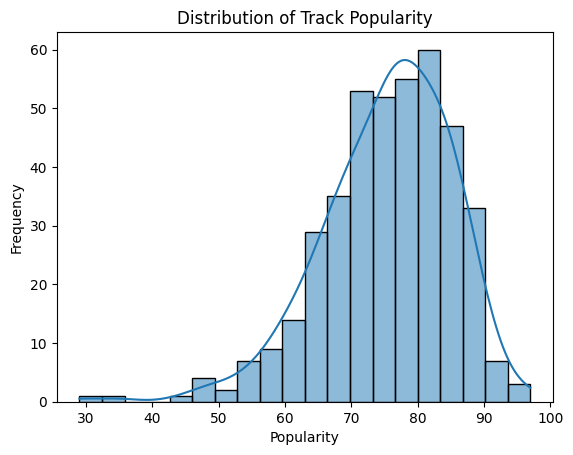

In [12]:
#2.  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

sns.histplot(df['Popularity'], bins=20, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

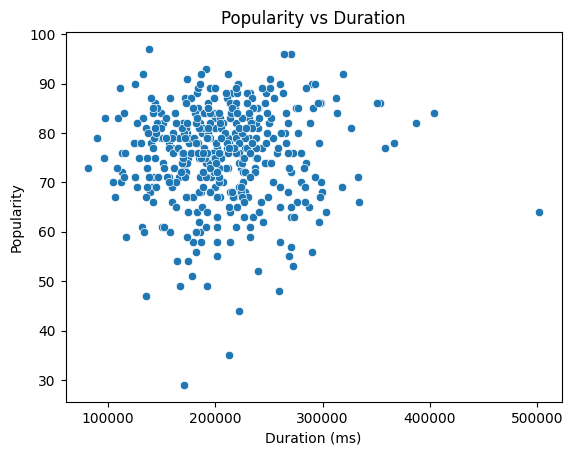

In [13]:
#3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title("Popularity vs Duration")
plt.show()

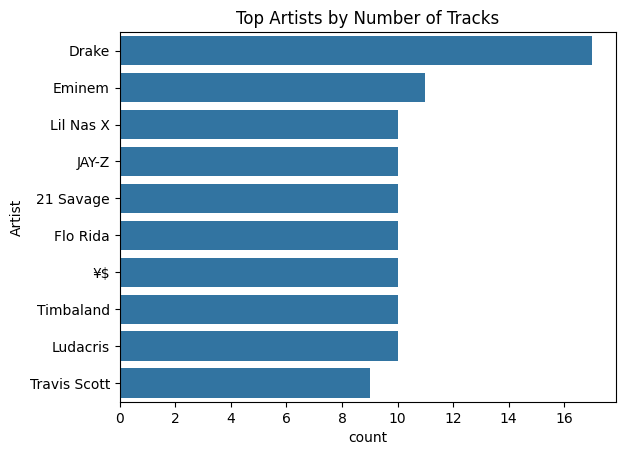

In [14]:
#4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

sns.countplot(data=df, y='Artist', order=df['Artist'].value_counts().head(10).index)
plt.title("Top Artists by Number of Tracks")
plt.show()


In [15]:
#5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [16]:
#6.  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

top_artists = df['Artist'].value_counts().head(5).index
avg_popularity = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print(avg_popularity)


Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64


In [17]:
#7.  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

for artist in top_artists:
    top_track = df[df['Artist'] == artist].sort_values(by='Popularity', ascending=False).head(1)
    print(f"{artist}: {top_track['Track Name'].values[0]}")


Drake: Rich Baby Daddy (feat. Sexyy Red & SZA)
Eminem: Without Me
Lil Nas X: THATS WHAT I WANT
JAY-Z: Ni**as In Paris
21 Savage: redrum


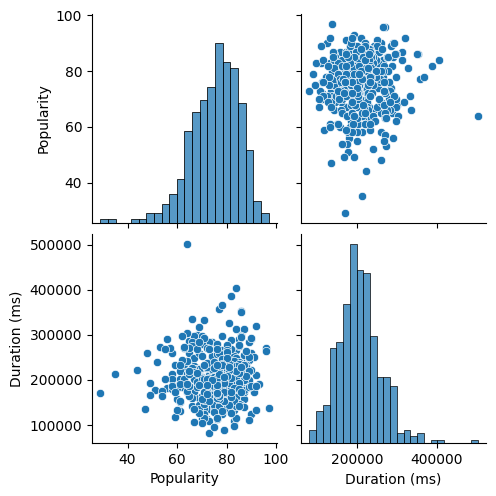

In [18]:
#8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()


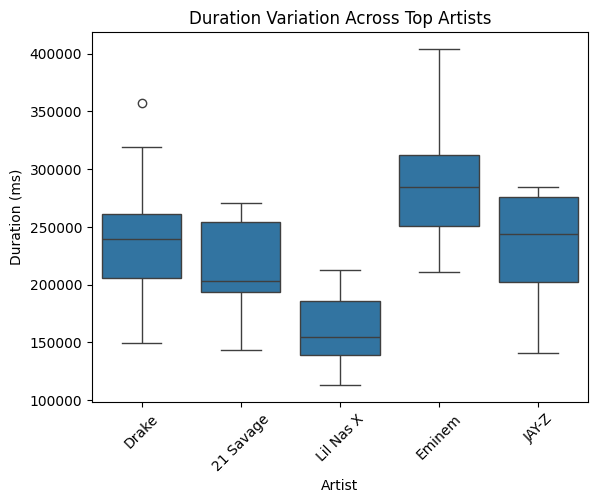

In [19]:
#9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

sns.boxplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)')
plt.title("Duration Variation Across Top Artists")
plt.xticks(rotation=45)
plt.show()


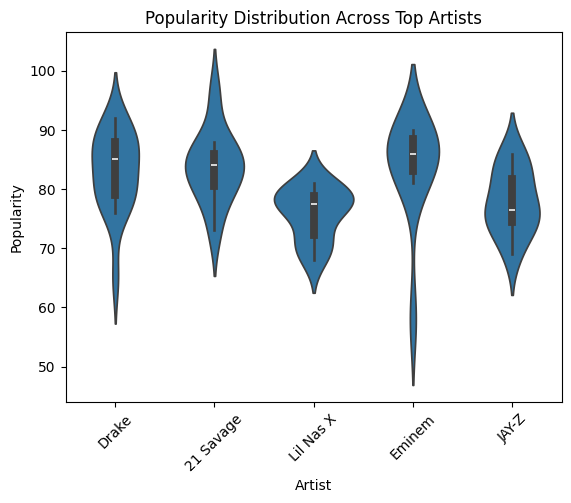

In [20]:
#10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

sns.violinplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Popularity')
plt.title("Popularity Distribution Across Top Artists")
plt.xticks(rotation=45)
plt.show()
